# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt

from pylab import rcParams

# Data

The following data was taken from the [*NumCosmo*](https://github.com/NumCosmo/NumCosmo) repository.

In [2]:
sample ={'mu': [34.117469999999997, 34.082340000000002, 34.070259999999998, 34.404829999999997, 34.128639999999997, 34.451230000000002, 34.318800000000003, 34.215560000000004, 34.161239999999999, 34.488590000000002, 34.575380000000003, 34.493369999999999, 34.940350000000002, 35.145130000000002, 35.249839999999999, 35.227229999999999, 34.93018, 35.191389999999998, 35.352319999999999, 35.34151, 35.56503, 35.14931, 35.994030000000002, 35.821800000000003, 35.558, 35.531300000000002, 35.78839, 35.836199999999998, 36.112879999999997, 36.28389, 36.275149999999996, 36.727640000000001, 36.382930000000002, 36.82694, 36.631860000000003, 36.793500000000002, 36.60604, 37.540019999999998, 37.603360000000002, 37.641710000000003, 37.464709999999997, 38.12106, 38.43656, 38.88447, 40.570869999999999, 40.682099999999998, 40.730200000000004, 40.998739999999998, 40.945410000000003, 41.25853, 41.322809999999997, 41.36636, 41.440710000000003, 41.473939999999999, 41.48489, 41.48789, 41.771929999999998, 41.775739999999999, 41.86542, 42.037439999999997, 42.030110000000001, 42.08907, 42.267910000000001, 42.17991, 42.428370000000001, 42.439010000000003, 42.643340000000002, 42.591529999999999, 42.824269999999999, 42.486130000000003, 42.461010000000002, 42.51052, 42.46461, 42.760820000000002, 42.880760000000002, 42.561369999999997, 42.514989999999997, 42.79513, 42.960189999999997, 43.02993, 42.745910000000002, 43.13241, 43.022689999999997, 43.397129999999997, 43.0456, 43.143700000000003, 43.022579999999998, 43.236460000000001, 43.17559, 43.208649999999999, 43.28689, 43.426960000000001, 43.169130000000003, 43.452640000000002, 43.353000000000002, 43.489539999999998, 43.691070000000003, 43.94979, 43.651919999999997, 43.531529999999997, 43.543680000000002, 44.41386, 43.474789999999999, 43.870280000000001, 44.094340000000003, 43.707729999999998, 44.258890000000001, 44.552239999999998, 44.429130000000001, 43.506959999999999, 43.953150000000001, 43.62209, 43.999270000000003, 43.940669999999997, 44.672240000000002], 
        'sigma': [0.19292000000000001, 0.19033, 0.19617999999999999, 0.18698999999999999, 0.18648000000000001, 0.18865000000000001, 0.18634999999999999, 0.18315999999999999, 0.18215000000000001, 0.18018999999999999, 0.17867, 0.17172999999999999, 0.16571, 0.16145999999999999, 0.16600999999999999, 0.16137000000000001, 0.15934000000000001, 0.15994, 0.16148999999999999, 0.15581999999999999, 0.19253999999999999, 0.15323999999999999, 0.15362000000000001, 0.24753, 0.15085999999999999, 0.15947, 0.15057999999999999, 0.14807999999999999, 0.14657999999999999, 0.14294999999999999, 0.14374000000000001, 0.14305999999999999, 0.14054, 0.14433000000000001, 0.13855999999999999, 0.13921, 0.14169999999999999, 0.13900000000000001, 0.1394, 0.14005999999999999, 0.13743, 0.13893, 0.14224999999999999, 0.14007, 0.13249, 0.13172, 0.13195000000000001, 0.13503999999999999, 0.13167999999999999, 0.13138, 0.13161999999999999, 0.13266, 0.13228999999999999, 0.13173000000000001, 0.13203000000000001, 0.13446, 0.13369, 0.13657, 0.13833000000000001, 0.13447000000000001, 0.14319000000000001, 0.13549, 0.13478999999999999, 0.13639999999999999, 0.13677, 0.14183999999999999, 0.14221, 0.15515000000000001, 0.15376000000000001, 0.14235999999999999, 0.13555, 0.13421, 0.14868999999999999, 0.13919000000000001, 0.14176, 0.15886, 0.13417999999999999, 0.13671, 0.14465, 0.14410000000000001, 0.13569000000000001, 0.14562, 0.14354, 0.15769, 0.14005000000000001, 0.18895999999999999, 0.15690000000000001, 0.18373, 0.15179999999999999, 0.16864999999999999, 0.15110000000000001, 0.17566000000000001, 0.15923999999999999, 0.14326, 0.15151000000000001, 0.15898000000000001, 0.32857999999999998, 0.29466999999999999, 0.28556999999999999, 0.33106999999999998, 0.25391999999999998, 0.37047000000000002, 0.22628999999999999, 0.36829000000000001, 0.32807999999999998, 0.28938999999999998, 0.36984, 0.40148, 0.44995000000000002, 0.30181999999999998, 0.29831000000000002, 0.26844000000000001, 0.31807000000000002, 0.51326000000000005, 0.54895000000000005], 
        'z': [0.015429999999999999, 0.015879999999999998, 0.016150000000000001, 0.016310000000000002, 0.016449999999999999, 0.01661, 0.016830000000000001, 0.01721, 0.017340000000000001, 0.017649999999999999, 0.01814, 0.01983, 0.021839999999999998, 0.023230000000000001, 0.02351, 0.024160000000000001, 0.024559999999999998, 0.024819999999999998, 0.025940000000000001, 0.02605, 0.02632, 0.027900000000000001, 0.029610000000000001, 0.030130000000000001, 0.03057, 0.030630000000000001, 0.031559999999999998, 0.034799999999999998, 0.036490000000000002, 0.039280000000000002, 0.042909999999999997, 0.04512, 0.048759999999999998, 0.050099999999999999, 0.050220000000000001, 0.052979999999999999, 0.053710000000000001, 0.06336, 0.070760000000000003, 0.074789999999999995, 0.078850000000000003, 0.087760000000000005, 0.10083, 0.12470000000000001, 0.24859999999999999, 0.26300000000000001, 0.28499999999999998, 0.29120000000000001, 0.33100000000000002, 0.33729999999999999, 0.3402, 0.34599999999999997, 0.35699999999999998, 0.35780000000000001, 0.36899999999999999, 0.37090000000000001, 0.41499999999999998, 0.42999999999999999, 0.44900000000000001, 0.45100000000000001, 0.4607, 0.4627, 0.46999999999999997, 0.496, 0.50429999999999997, 0.52100000000000002, 0.52600000000000002, 0.53200000000000003, 0.54800000000000004, 0.55000000000000004, 0.55159999999999998, 0.55700000000000005, 0.57099999999999995, 0.58099999999999996, 0.58169999999999999, 0.59199999999999997, 0.60399999999999998, 0.60999999999999999, 0.61299999999999999, 0.62, 0.62680000000000002, 0.63300000000000001, 0.64300000000000002, 0.67900000000000005, 0.68799999999999994, 0.69099999999999995, 0.69499999999999995, 0.70699999999999996, 0.70999999999999996, 0.72099999999999997, 0.72999999999999998, 0.74099999999999999, 0.752, 0.75600000000000001, 0.79100000000000004, 0.80000000000000004, 0.81000000000000005, 0.81100000000000005, 0.81699999999999995, 0.81799999999999995, 0.82179999999999997, 0.82999999999999996, 0.83999999999999997, 0.86799999999999999, 0.87, 0.90500000000000003, 0.91000000000000003, 0.92710000000000004, 0.93000000000000005, 0.94899999999999995, 0.94999999999999996, 0.95999999999999996, 0.96099999999999997, 0.98299999999999998, 1.01]
         }

In [3]:
df = pd.DataFrame(sample)

# Functions

In [4]:
c = 3e5 #(km/s)

def Dc(z, params):
    if len(params) == 3:
        def f(z, params):
            return (np.sqrt(params[0] + params[1]*(1 + z)**3))**(-1)
        return quad(f, 0, z, args = params[0:2])[0]
    else:
        def f(z, params):
            return (np.sqrt(params[0] + params[1]*(1 + z)**3 + params[3]*(1 + z)**2 + params[4]*(1 + z)**4))**(-1)
        return quad(f, 0, z, args = params)[0]

def Dt(z, params):
    if len(params) == 3:
        return Dc(z, params)
    else:
        return np.sinh(np.sqrt(params[3])*Dc(z, params))/np.sqrt(params[3])

def Dl(z, params):
    return (1 + z) * Dt(z, params)
               
def mu(z, params):
    return 5*np.log10(Dl(z, params)) + 25 + 5*np.log10(c/ params[2])

def chi2_i(mu_o, sigma_o, z_obs, params):
    return ((mu(z_obs, params) - mu_o)**2)/sigma_o**2

def chi2(params, df):
    values = []
    for idx in df.index:
        values.append(chi2_i(df.mu[idx], df.sigma[idx], df.z[idx], params))
    return sum(values)

# Scatter plot and Hubble Diagram

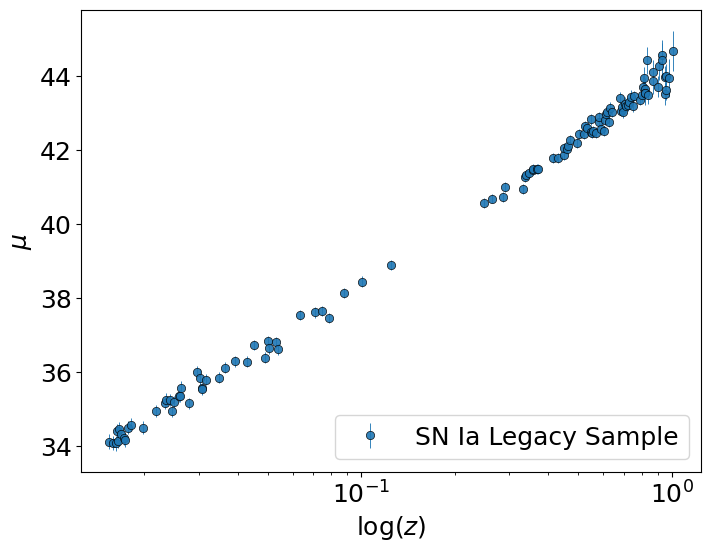

In [5]:
rcParams['figure.figsize'] = 8, 6
fontsize = 18
plt.errorbar(sample['z'], sample['mu'], yerr=sample['sigma'], fmt="o", markeredgecolor = 'k', markeredgewidth = 0.5, linewidth = 0.7, alpha = 0.9, label = 'SN Ia Legacy Sample')

plt.xscale('log')
plt.ylabel('$\mu$', fontsize = fontsize)
plt.xlabel('$\log(z)$', fontsize = fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(loc='lower right', fontsize = fontsize)

plt.savefig('images/hubble_diagram_snia.pdf')  

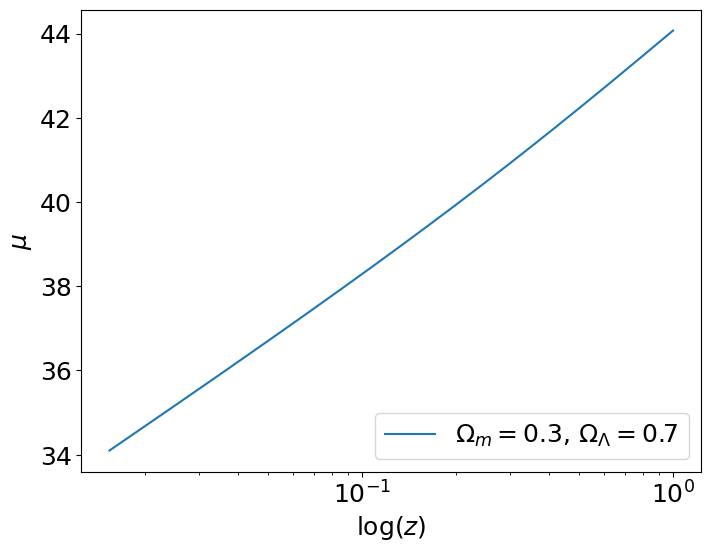

In [7]:
rcParams['figure.figsize'] = 8, 6
mu_list = []
redshift_dist = np.linspace(0.015429999999999999, 1, 1000)
for z in redshift_dist:
    mu_list.append(mu(z, [0.7, 0.3, 71]))
    
plt.plot(redshift_dist, mu_list, label = '$\Omega_m = 0.3$, $\Omega_\Lambda = 0.7$')


plt.xscale('log')
plt.ylabel('$\mu$', fontsize = fontsize)
plt.xlabel('$\log(z)$', fontsize = fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(loc='lower right', fontsize = fontsize)

plt.savefig('images/hubble_diagram_theory.pdf')  

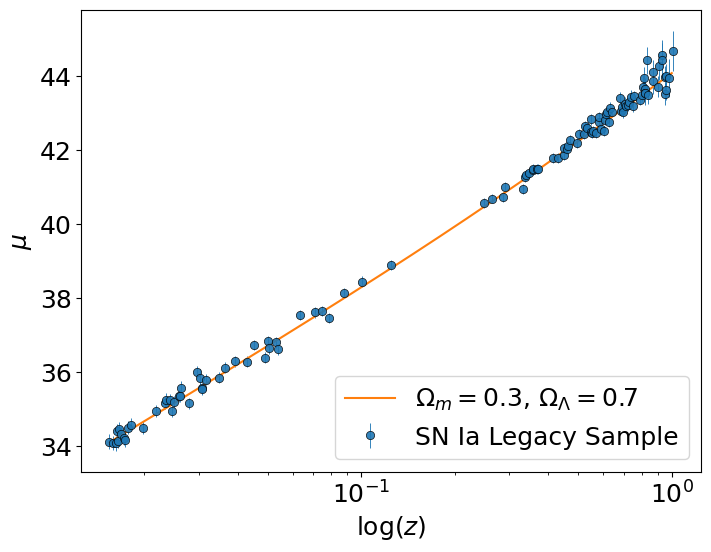

In [8]:
rcParams['figure.figsize'] = 8, 6
plt.errorbar(sample['z'], sample['mu'], yerr=sample['sigma'], fmt="o", markeredgecolor = 'k', markeredgewidth = 0.5, linewidth = 0.7, alpha = 0.9, label = 'SN Ia Legacy Sample')

plt.plot(redshift_dist, mu_list, label = '$\Omega_m = 0.3$, $\Omega_\Lambda = 0.7$')

plt.xscale('log')
plt.ylabel('$\mu$', fontsize = fontsize)
plt.xlabel('$\log(z)$', fontsize = fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(loc='lower right', fontsize = fontsize)

# Item a)

## Maximum Likelihood Parameters

In [9]:
params = [0.75, 0.25, 71] # params = [Omega Lambda, Omega Matter, Hubble's Constant, Omega Curvature, Omega Radiation]

minimum = minimize(chi2, x0 = params, args = (df), method = 'Nelder-Mead', tol = 1e-6, bounds = ((0,1), (0,1), (0, None)))
print('Result of minimization:', '\n', minimum, '\n\n')
print('Maximum Likelihood Parameters:\n', f'Omega_Lambda: {minimum.x[0]}', '\n', f'Omega_Matter: {minimum.x[1]}', '\n', f'Hubble: {minimum.x[2]}')

Result of minimization: 
  final_simplex: (array([[ 0.73654492,  0.26206903, 70.11226543],
       [ 0.73654492,  0.26206903, 70.1122655 ],
       [ 0.73654491,  0.26206903, 70.11226594],
       [ 0.73654491,  0.26206903, 70.11226575]]), array([110.99870476, 110.99870476, 110.99870476, 110.99870476]))
           fun: 110.998704764517
       message: 'Optimization terminated successfully.'
          nfev: 193
           nit: 98
        status: 0
       success: True
             x: array([ 0.73654492,  0.26206903, 70.11226543]) 


Maximum Likelihood Parameters:
 Omega_Lambda: 0.736544919860062 
 Omega_Matter: 0.2620690317357481 
 Hubble: 70.11226542930314


## Confidence Region for $\Omega_{\Lambda}$ and $\Omega_m$

C:\Users\lucas.corbanez\AppData\Local\Temp\ipykernel_4948\96576753.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(params[0] + params[1]*(1 + z)**3))**(-1)
C:\Users\lucas.corbanez\AppData\Local\Temp\ipykernel_4948\96576753.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(f, 0, z, args = params[0:2])[0]


Text(0, 0.5, '$\\Omega_m$')

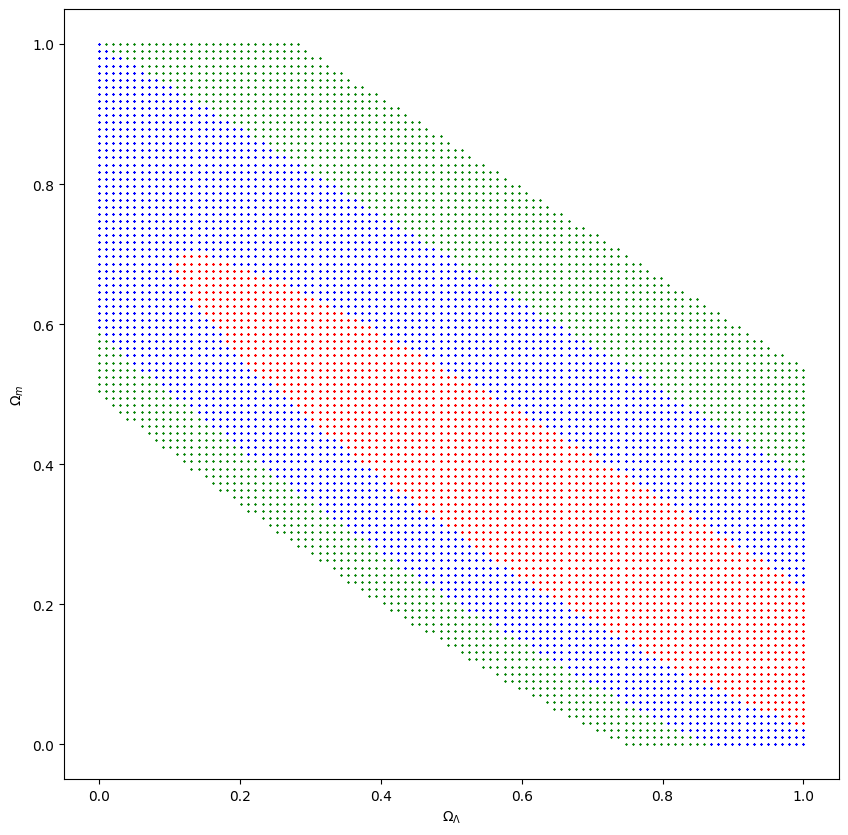

In [10]:
rcParams['figure.figsize'] = 10, 10

latice_size = 100
sigma1, sigma2, sigma3 = 0.6827, 0.9545, 0.9973
lambda1, lambda2, lambda3 = stats.chi2.ppf(sigma1, 2), stats.chi2.ppf(sigma2, 2), stats.chi2.ppf(sigma3, 2)

chi2null = chi2(minimum.x, df)

deltas = {'omegas': np.linspace(0, 1, latice_size), 'hubble': np.linspace(50, 100, latice_size)}

for idx in deltas['omegas']:
    for idx2 in deltas['omegas']:
        params = [idx, idx2, minimum.x[2]]
        chi2alt = chi2(params, df)
        
        if chi2alt/chi2null < lambda1:
            plt.scatter(params[0], params[1], s = 1, marker = 'x', color = 'red', label = '$3\sigma$')
            
        elif lambda1 < chi2alt/chi2null < lambda2:
            plt.scatter(params[0], params[1], s = 0.75, marker = 'x', color = 'blue', label = '$2\sigma$')
            
        elif lambda2< chi2alt/chi2null < lambda3:
            plt.scatter(params[0], params[1], s = 0.5, marker = 'x', color = 'green', label = '$1\sigma$')
            
plt.xlabel('$\Omega_{\Lambda}$')
plt.ylabel('$\Omega_m$')

# Item b)

In [11]:
params = [0.74, 0.24, 71, 0.02, 1e-5] # params = [Omega Lambda, Omega Matter, Hubble's Constant, Omega Curvature, Omega Radiation]

minimum = minimize(chi2, x0 = params, args = (df), method = 'Nelder-Mead', tol = 1e-6, bounds = ((0,0.77), (0,0.26), (0, None), (0,1), (0,1)))
print('Result of minimization:', '\n', minimum, '\n\n')
print('Maximum Likelihood Parameters:\n', f'Omega_Lambda: {minimum.x[0]}', '\n', f'Omega_Matter: {minimum.x[1]}', '\n', f'Omega_Curvature: {minimum.x[3]}', '\n', f'Omega_Radiation: {minimum.x[4]}', '\n', f'Hubble: {minimum.x[2]}')

C:\Users\lucas.corbanez\AppData\Local\Temp\ipykernel_4948\96576753.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.sinh(np.sqrt(params[3])*Dc(z, params))/np.sqrt(params[3])


Result of minimization: 
  final_simplex: (array([[7.23055269e-01, 2.57253358e-01, 7.07635595e+01, 7.88467863e-14,
        8.19018864e-06],
       [7.23055251e-01, 2.57253359e-01, 7.07635600e+01, 2.04685809e-13,
        8.19018841e-06],
       [7.23055254e-01, 2.57253359e-01, 7.07635599e+01, 2.75209527e-13,
        8.19018845e-06],
       [7.23055263e-01, 2.57253358e-01, 7.07635597e+01, 3.41272294e-13,
        8.19018855e-06],
       [7.23055252e-01, 2.57253359e-01, 7.07635600e+01, 2.53997667e-13,
        8.19018839e-06],
       [7.23055244e-01, 2.57253359e-01, 7.07635602e+01, 2.19768428e-13,
        8.19018837e-06]]), array([110.99869098, 110.99869098, 110.99869098, 110.99869098,
       110.99869098, 110.99869098]))
           fun: 110.99869097716466
       message: 'Optimization terminated successfully.'
          nfev: 789
           nit: 471
        status: 0
       success: True
             x: array([7.23055269e-01, 2.57253358e-01, 7.07635595e+01, 7.88467863e-14,
       8.1901886

# Spectral plot of ASASSN-15bc; AstroCatalog 2015-2019

In [12]:
import json

with open('data/asassn15bc.json') as f:
    asassn15bc = json.load(f)

In [13]:
wavelengh = []
flux = []
for l in asassn15bc['ASASSN-15cb']['spectra'][0]['data']:
    wavelengh.append(float(l[0]))
    flux.append(float(l[1])*1e16)

In [14]:
norm_flux = [i/max(flux) for i in flux]

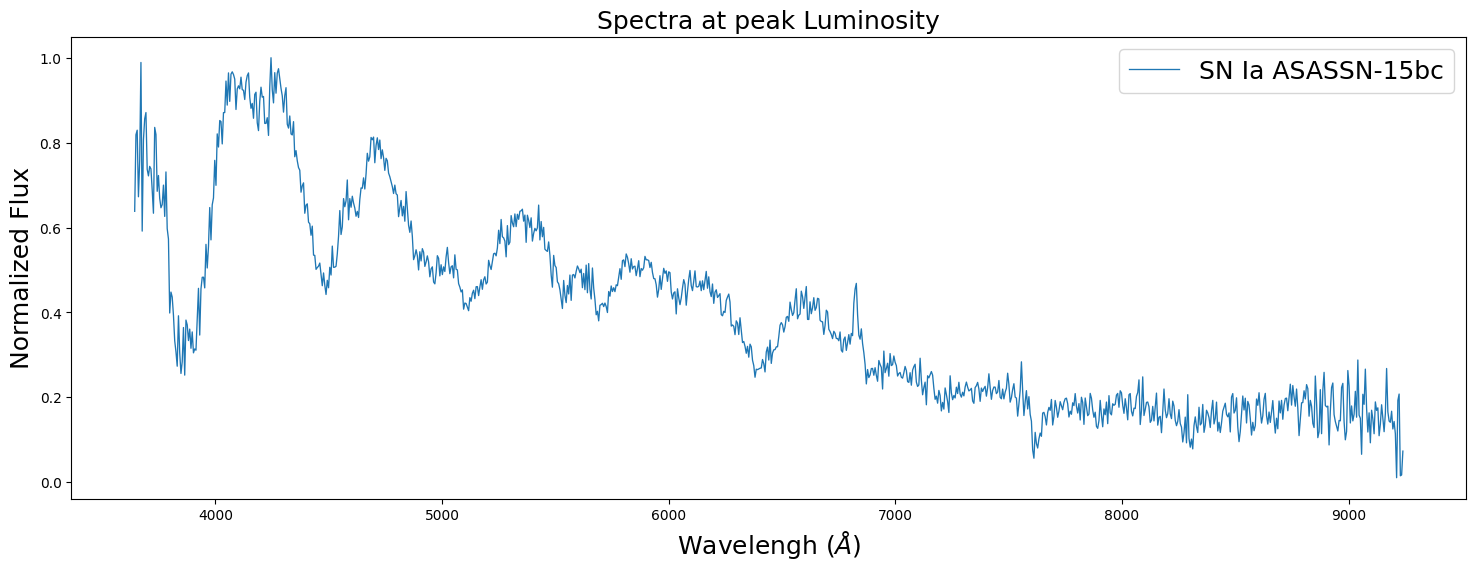

In [181]:
rcParams['figure.figsize'] = 18, 6

plt.plot(wavelengh, norm_flux, linewidth = 0.95, label = 'SN Ia ASASSN-15bc')
plt.xlabel('Wavelengh ($\AA$)', fontsize = fontsize)
plt.ylabel('Normalized Flux', fontsize = fontsize)
plt.legend(fontsize = fontsize)

plt.title('Spectra at peak Luminosity', fontsize=fontsize)

plt.savefig('images/snia_spectra.pdf')  

# Photometry plot for ASASSN-13cu; AstroCatalog 2010-2014

In [140]:
photometry = pd.read_csv('data/snia_2004ef_photometry.csv')

In [141]:
photometry = photometry.replace({'\)': ''}, regex=True)

In [142]:
for col in ['u', 'g', 'r', 'i', 'B', 'V']: 
    photometry[[col, col+'_err']] = photometry[col].str.split('(', 1,expand = True)
    
for i in photometry.columns:
    photometry[i] = photometry[i].astype(float)
    
for col in ['u', 'g', 'r', 'i', 'B', 'V']: 
    photometry[col+'_err'] = photometry[col+'_err']/1000

Text(0.5, 1.0, 'SN Ia 2004ef - All bands')

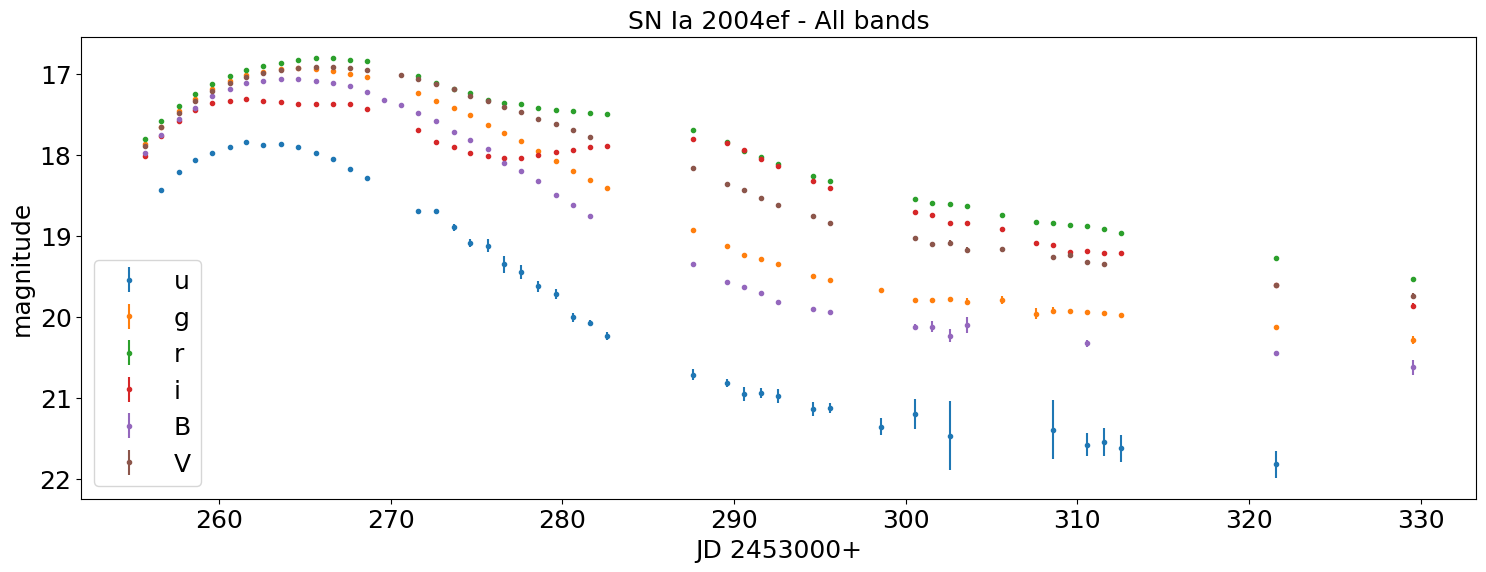

In [143]:
for col in ['u', 'g', 'r', 'i', 'B', 'V']: 
    plt.errorbar(photometry.JD, photometry[col], photometry[col+'_err'], fmt="o", markersize = 3, label = f'{col}')
plt.gca().invert_yaxis()

plt.xlabel('JD 2453000+', fontsize = fontsize)
plt.ylabel('magnitude', fontsize = fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)

plt.title('SN Ia 2004ef - All bands', fontsize = fontsize)

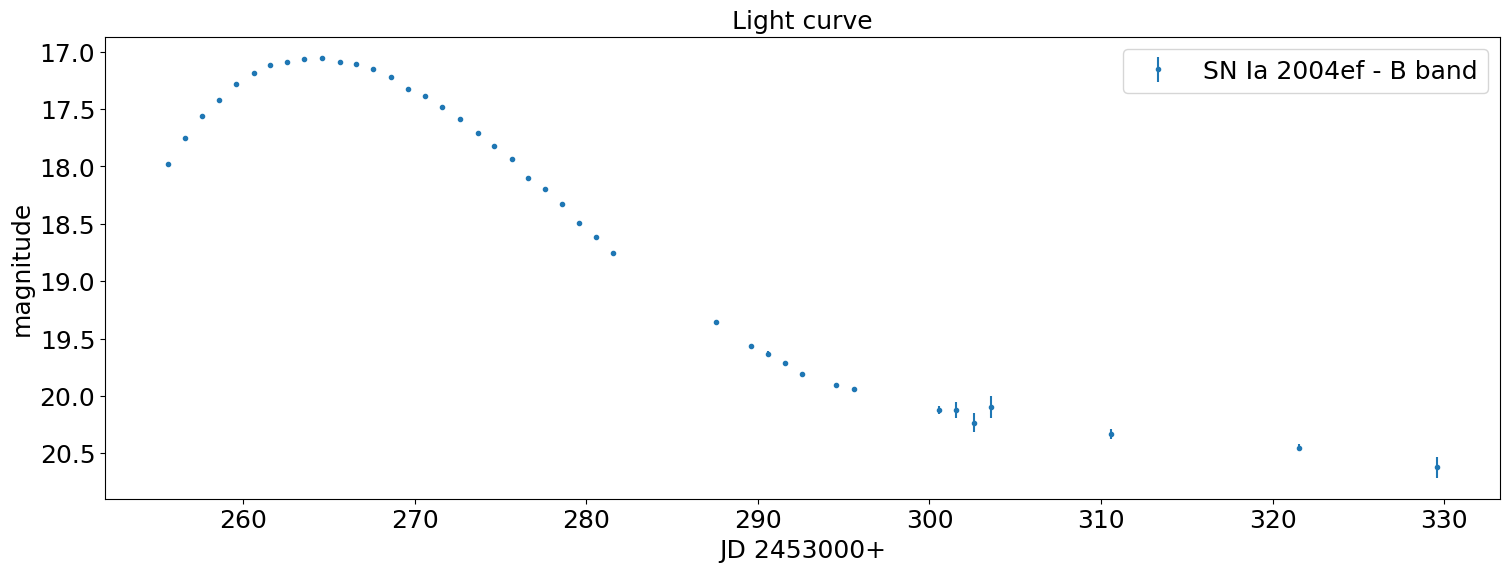

In [180]:
for col in ['B']: 
    plt.errorbar(photometry.JD, photometry[col], photometry[col+'_err'], fmt="o", markersize = 3, label = f'SN Ia 2004ef - {col} band')
plt.gca().invert_yaxis()


plt.xlabel('JD 2453000+', fontsize = fontsize)
plt.ylabel('magnitude', fontsize = fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(fontsize = fontsize)


plt.title('Light curve', fontsize = fontsize)

plt.savefig('images/snia_luminosity_curve.pdf')  